In [1]:
# First, we will deal with the time series data and therefore we need to import the datetime module
from datetime import timedelta, datetime as dt

# Second, let's import pandas library for storing and manipulation stock price, volume and RSI data
import pandas as pd
# use pandas_datareader to import data from finance.yahoo
from pandas_datareader.data import get_data_yahoo

# Third, let's import matplotlib library with all of its modules
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
# Then will import the collection of finance-related functions from matplotlib:
from matplotlib.finance import * 
# Additionally, we will need to import several additional modules with their respective classes:
from matplotlib.dates import DateFormatter, WeekdayLocator, MONDAY
from matplotlib import ticker, gridspec
# DateFormatter is required to properly format dates on the chart
# WeedayLocator is used to locate days of the week on the chart
# ticker module contains classes to support completely configurable tick locating and formatting 
# gridspec specifies the geometry of the grid.

/Users/yuriymatso/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# Now that we are done with libraries, let's get the stock price and volume data
# We will use datetime and pandas modules to get the most recent data dating back 100 days from finance.yahoo
# Data is available on finance.yahoo in a cvs format, but we will use pandas to pull the data directly into notebook
# First, we need to define 2 variables using 'datetime' module and define the # of days we would like to pull data for
date2 = dt.now().date()
date1 = date2 - timedelta(days=600)
# Now we are ready to use pandas 'get_data_yahoo' method to pull data from finance.yahoo
df = get_data_yahoo('TSLA', date1, date2)
df[-10:]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-31,278.730011,279.679993,276.320007,278.299988,3288600,278.299988
2017-04-03,286.899994,299.000000,284.579987,298.519989,13842300,298.519989
2017-04-04,296.890015,304.809998,294.529999,303.700012,10099400,303.700012
2017-04-05,302.040009,304.880005,294.200012,295.000000,7839500,295.000000
2017-04-06,296.880005,301.940002,294.100006,298.700012,5512600,298.700012
2017-04-07,297.500000,302.690002,297.149994,302.540009,4524200,302.540009
2017-04-10,309.149994,313.730011,308.709991,312.390015,7619300,312.390015
2017-04-11,313.380005,313.470001,305.500000,308.709991,5716100,308.709991
2017-04-12,306.339996,308.450012,296.320007,296.839996,6035100,296.839996


In [3]:
# Since we won't be using 'Adjusted Close' in our notebook, let's get rid of it by using pandas' delete method
del df['Adj Close']
df[-10:]

,Open,High,Low,Close,Volume
Date,,,,,
2017-03-31,278.730011,279.679993,276.320007,278.299988,3288600
2017-04-03,286.899994,299.000000,284.579987,298.519989,13842300
2017-04-04,296.890015,304.809998,294.529999,303.700012,10099400
2017-04-05,302.040009,304.880005,294.200012,295.000000,7839500
2017-04-06,296.880005,301.940002,294.100006,298.700012,5512600
2017-04-07,297.500000,302.690002,297.149994,302.540009,4524200
2017-04-10,309.149994,313.730011,308.709991,312.390015,7619300
2017-04-11,313.380005,313.470001,305.500000,308.709991,5716100
2017-04-12,306.339996,308.450012,296.320007,296.839996,6035100


In [4]:
# Let's create a python function which will contain all of the elements of our chart.
# Our function will be very simple and will contain the following 3 parameters: 'title', 'dataframe' and 'display'
def plot_data(title, df, display=True):

    # Let's define the chart using matplotlib's syntex. We need to provide inputs on the figure and grid coordinates
    # figsize = width, height
    fig = plt.figure(figsize=(20, 10))
    # Let's provide the grid coordinatates for our chart
    # Gridspec module specifies the geometry of the grid that a subplot will be placed.
    # We need to set the number of rows - 3 and number of columns - 1 as well as their height ratios
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1]) 
    
    # Plot the first subplot - ax1 - which will be our stock's candlestick chart:  
    ax1 = plt.subplot(gs[0])
    # Let's point to our dataframe and specify the visual components of the chart:
    candlestick_ochl(
        ax1, 
        ((date2num(r.Index), r.Open, r.Close, r.High, r.Low) for r in df.itertuples()), 
        width=1,  
        colorup='g',  
        colordown='r',
    )
    
    plt.title(title)
    
    # Plot the second chart component: stock's volume
    ax2 = plt.subplot(gs[1])    
    
    # We want to differentiate positive from negative volume days
    pos_volumes = df[df.Close >= df.Open]
    neg_volumes = df[df.Close < df.Open]
    # Then we have to use helper function date2num to ...?
    pos_dates = [date2num(date) for date in pos_volumes.index]
    neg_dates = [date2num(date) for date in neg_volumes.index]
    # Let's create visualization for our volume bars:
    ax2.bar(pos_dates, pos_volumes['Volume'].tolist(), color='green', align='center', label="Up days")
    ax2.bar(neg_dates, neg_volumes['Volume'].tolist(), color='red', align='center', label="Down days") 
    
    # Set x axis:
    x_min, x_max = df.index.min(), df.index.max()  
    
    # set x axis limits:
    x_min, x_max = x_min - timedelta(days=1), x_max + timedelta(days=1)
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(df.Low.min() - (0.1*df.Low.min()), df.High.max() + (0.05*df.High.max()))
    
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(0, df.Volume.max() + (0.1*df.Volume.max()))
        
    
    # Format the chart with candle sticks 
    weekFormatter = DateFormatter('%b %d')
    mondays = WeekdayLocator(MONDAY)
    ax1.xaxis.set_major_locator(mondays)
    ax1.xaxis.set_major_formatter(weekFormatter)
    ax1.yaxis.set_label_position("right")
    ax1.set_ylabel('Stock prices, $')
    ax1.yaxis.tick_right()
    
    ax2.legend(fancybox=True, loc='best')
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    # Now, we have to format our y axis by defining a function for the formating
    # We will use matplotlibs FuncFormatter function and also use an anonymous function lambda to input a parameter
    # To use the function, we will input lambda arguments and lambda expression after ':'
    # We will have to use the whole numbers in our y-asix, that's why we will use special Python formatting for that:
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dM" % (x / 1000000)))
    ax2.set_ylabel('Volume, M')
    ax2.xaxis.set_major_locator(mondays)  
    ax2.xaxis.set_major_formatter(weekFormatter)
    
    # To finish our function, we need to use our 'display' parameter and use plt.show argument
    
    if display:
        plt.show()

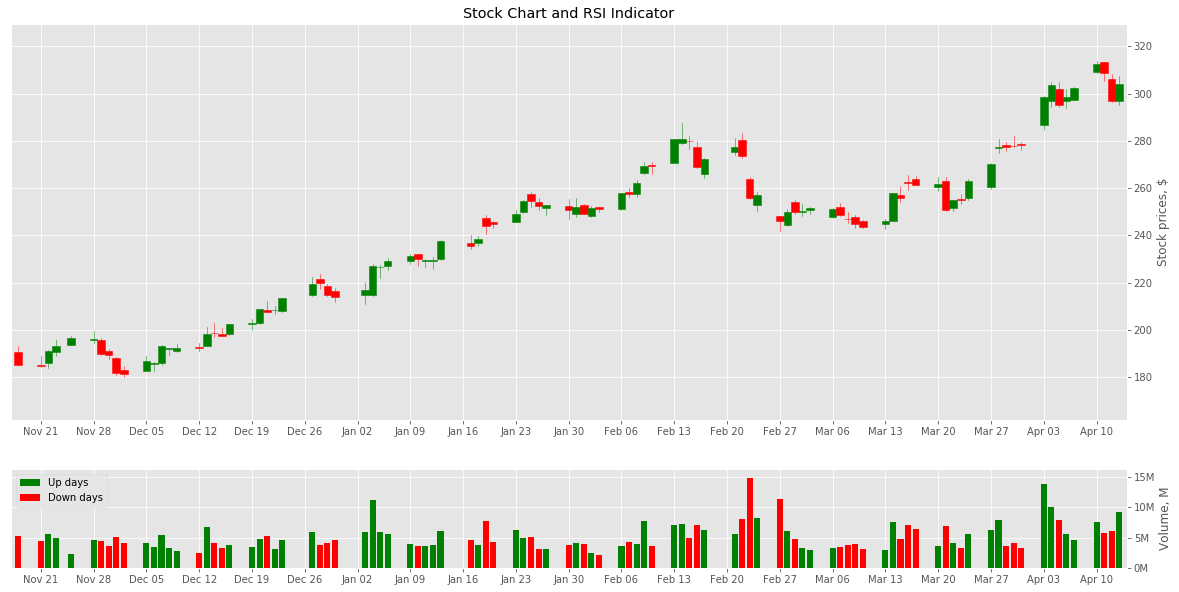

In [6]:
# Now that we finished our function, let's call it and plot our chart:
plot_data('Stock Chart and RSI Indicator', df[-100:])